# C2 en moabita

### La estela de Mesa

La estela de Mesa es el (casi) único texto que se conserva en lengua moabita, una lengua semítica muy cercana al hebreo bíblico que se habló en el reino de Moab, en la actual Jordania, sobre los siglos X-VIII a.e.c. Se descubrió y descifró en el siglo XIX y en la actualidad se encuentra en el museo del Louvre.
En este trabajo se analizarán las inscripciones (en alfabeto fenicio), sus frecuencias, raíces, etc.
Si se traduce, se puede añadir al currículum que se tiene un C2 en moabita, dado que es el único texto que actualmente se conserva en esta lengua.


<center><img src="./img/estela_mesa.jfif"/></center>


Para analizar esta estela voy a utilizar un dataset del Antiguo Testamento, tanto en hebreo como en arameo, así como un dataset de la estela que crearé a partir del texto mostrado en la [página de Wikipedia](https://en.wikipedia.org/wiki/Mesha_Stele).

La justificación de usar como comparación el texto del Antiguo Testamento es que es la lengua más cercana de la cual se conserva un corpus importante procedente de una región cercana en el espacio y el tiempo.

Las hipótesis que se van a poner a prueba son:
- Las letras en protofenicio tienen frecuencia similar a las hebreas y se podría intentar descifrar el alfabeto solo con frecuencias.
- El lenguaje estela cumple la ley de Zipf.
- Sigue estructura de lengua semítica (raíces trilíteras, preposiciones y conjunciones enclíticas, ¿estado constructo?).
- ¿Se puede descifrar algo con ayuda de un diccionario de hebreo antiguo?

### Los datasets

In [81]:
# Importo las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import squarify
from pywaffle import Waffle
from matplotlib_venn_wordcloud import venn2_wordcloud
from utils.functions_df import *
from utils.functions_text import *
from utils.functions_plot import *

In [82]:
# DataFrame de la Biblia:
biblia = importar_palabras_biblia()
# No hay problema si aparecen unos cuantos avisos de caracteres no iterables o no reconocidos, simplemente avisa de que no puede hacer la transcripción de las
# raíces inexistentes en el dataset.

# En caso de que dé error, importar el csv comentando la línea anterior y descomentando la siguiente:
#biblia = pd.read_csv('./data/biblia.csv', index_col='Unnamed: 0')

Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no reconocido
Caracter no reconocido
Caracter no reconocido
Caracter no iterable
Caracter no reconocido
Caracter no iterable
Caracter no reconocido
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no reconocido
Caracter no iterable
Caracter no iterable
Caracter no reconocido
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no reconocido
Caracter no reconocido
Caracter no iter

In [83]:
# Texto de la estela de Mesa
texto_estela = importar_mesa()
# En caso de que dé error, comentar la línea anterior y descomentar la siguiente:
#texto_estela = pd.read_csv('./data/texto_estela.csv', index_col='Unnamed: 0')

El dataframe de la Biblia consta de 9 columnas:
- strongs_number: Es el número de palabra según la lista de la obra de Strong. Es un número más que el índice
- word: La palabra en hebreo vocalizada.
- gloss: Trasliteración y significados.
- language: H si es hebreo y A si es arameo.
- part_of_speech: Función morfológica de la palabra (nombre, verbo, adjetivo...).
- gender: Género de la palabra.
- occurrences: Número de veces que aparece la palabra en el Antiguo Testamento.
- first_occurrence: Lugar del Antiguo Testamento donde esta palabra aparece por primera vez.
- root_word: Raíz de la palabra. Esto será de gran interés al final del análisis.
- word_root_occurrence: Número de veces que aparece esta raíz en el Antiguo Testamento. Será un número mayor o igual que occurences.
- transcripcion: Columna que he creado con la transcripción a alfabeto latino de la raíz de la palabra.

In [84]:
biblia.head()

,strongs_number,word,gloss,language,part_of_speech,gender,occurrences,first_occurrence,root_word,word_root_occurrence,transcripcion
0,1,אָב,ab (awb) n-m.\n1. father\n{in a literal and im...,H,noun,masculine,1210,GEN 2:24,אב,1414.0,Ab
1,2,אַב,ab (ab) n-m.\n1. father\n[(Aramaic) correspond...,A,noun,masculine,9,EZK 4:15,אב,1414.0,Ab
2,3,אֵב,'eb (abe) n-m.\n1. a green plant\n[from the s...,H,noun,masculine,2,JOB 8:12,אבב,13.0,Abb
3,4,אֵב,eb (abe) n-m.\n1. fruit\n[(Aramaic) correspond...,A,noun,masculine,3,DAN 4:12,אבב,13.0,Abb
4,5,אֲבַגתָּא,"Abagtha' (ab-ag-thaw') n/p.\n1. Abagtha, a eun...",H,noun proper,masculine,1,EST 1:10,NaN,NaN,0


El dataframe de la estela de Mesa consta de dos columnas:
- Texto: Texto de cada línea de la estela.
- línea: Número de línea en la estela física

Esta manera de exponer el dataframe es útil para comparar con el texto real, aunque poco útil para hacer el análisis.

<center><img src="./img/dibujo_mesa.png"/></center>


In [85]:
texto_estela

,Texto,línea
0,𐤀𐤍𐤊 𐤟 𐤌𐤔𐤏 𐤟 𐤁𐤍 𐤟 𐤊𐤌𐤔 ? ? 𐤌𐤋𐤊 𐤟 𐤌𐤀𐤁 𐤟 𐤄𐤃,1
1,𐤉𐤁𐤍𐤉 | 𐤀𐤁𐤉 𐤟 𐤌𐤋𐤊 𐤟 𐤏𐤋 𐤟 𐤌𐤀𐤁 𐤟 𐤔𐤋𐤔𐤍 𐤟 𐤔𐤕 𐤟 𐤅𐤀𐤍𐤊...,2
2,[𐤕𐤉 𐤟 𐤀𐤇𐤓 𐤟 𐤀𐤁𐤉 | 𐤅𐤀𐤏𐤔 𐤟 𐤄𐤁𐤌𐤕 𐤟 𐤆𐤀𐤕 𐤟 𐤋𐤊𐤌𐤔 𐤟 𐤁...,3
3,𐤔𐤏 𐤟 𐤊𐤉 𐤟 𐤄𐤔𐤏𐤍𐤉 𐤟 𐤌𐤊𐤋 𐤟 𐤄𐤔𐤋𐤊𐤍 𐤟 𐤅𐤊𐤉 𐤟 𐤄𐤓𐤀𐤍𐤉 𐤟 ...,4
4,𐤉 𐤟 𐤌𐤋𐤊 𐤟 𐤉𐤔𐤓𐤀𐤋 𐤟 𐤅𐤉𐤏𐤍𐤅 𐤟 𐤀𐤕 𐤟 𐤌𐤀𐤁 𐤟 𐤉𐤌𐤍 𐤟 𐤓𐤁𐤍...,5
5,𐤑𐤄 | 𐤅𐤉𐤇𐤋𐤐𐤄 𐤟 𐤁𐤍𐤄 𐤟 𐤅𐤉𐤀𐤌𐤓 𐤟 𐤂𐤌 𐤟 𐤄𐤀 𐤟 𐤀𐤏𐤍𐤅 𐤟 𐤀...,6
6,[𐤅𐤀𐤓𐤀 𐤟 𐤁𐤄 𐤟 𐤅𐤁𐤁𐤕𐤄 | 𐤅𐤉𐤔𐤓𐤀𐤋 𐤟 𐤀𐤁𐤃 𐤟 𐤀𐤁𐤃 𐤟 𐤏𐤋𐤌 ...,7
7,𐤑 𐤟 𐤌𐤄𐤃𐤁𐤀 | 𐤅𐤉𐤔𐤁 𐤟 𐤁𐤄 𐤟 𐤉𐤌𐤄 𐤟 𐤅𐤇𐤑𐤉 𐤟 𐤉𐤌𐤉 𐤟 𐤁𐤍𐤄...,8
8,𐤁𐤄 𐤟 𐤊𐤌𐤔 𐤟 𐤁𐤉𐤌𐤉 | 𐤅𐤀𐤁𐤍 𐤟 𐤀𐤕 𐤟 𐤁𐤏𐤋𐤌𐤏𐤍 𐤟 𐤅𐤀𐤏𐤔 𐤟 ...,9
9,𐤀𐤕 𐤟 𐤒𐤓𐤉𐤕𐤍 | 𐤅𐤀𐤔 𐤟 𐤂𐤃 𐤟 𐤉𐤔𐤁 𐤟 𐤁𐤀𐤓𐤑 𐤟 𐤏𐤈𐤓𐤕 𐤟 𐤌𐤏...,10


Si se analiza este texto, se ven dos símbolos que se repiten más de lo habitual: un punto (𐤟) y una pequeña línea vertical (|). El punto separa las palabras y la línea parece que separa frases. Esto último se discute, hay quien dice que es un símbolo de entonación. En todo caso, en este análisis vamos a asumir que cierra una idea, que es el fin de una frase.

Para continuar con el análisis, se van a utilizar dos dataframes más, uno que separa la estela por palabras y otro por letras:

In [86]:
palabras_estela = palabras_mesa(texto_estela)
letras_estela = letras_mesa(palabras_estela)
# Y, además, les voy a añadir la columna de transcripción:


In [87]:
palabras_estela

,palabra,linea_estela,numero_oracion,transcripcion
0,𐤀𐤍𐤊,1,1,Ank
1,𐤌𐤔𐤏,1,1,mš3
2,𐤁𐤍,1,1,bn
3,𐤊𐤌𐤔,1,1,kmš
4,𐤌𐤋𐤊,1,1,mlk
...,...,...,...,...
290,𐤁𐤉𐤌𐤉,33,36,bymy
291,𐤅𐤏𐤋,33,36,w3l
292,𐤓𐤄,33,36,rh
293,𐤌𐤔𐤌,33,36,mšm


Antes de continuar, se exponen algunos datos cuantitativos referentes a la estela:

In [88]:
lineas = len(texto_estela)
palabras = palabras_estela['palabra'].count()
palabras_unicas = len(palabras_estela['palabra'].unique())
letras = letras_estela['letra'].count()
letras_unicas = len(letras_estela['letra'].unique())
frases = palabras_estela['numero_oracion'].max()

print(f'La estela consta de {lineas} líneas.')
print(f'Se conservan {palabras} palabras en la estela de las cuales {palabras_unicas} son únicas.')
print(f'Se conservan {frases} frases en la estela.')
print(f'La estela tiene {letras} letras en total de las cuales {letras_unicas} son diferentes (sin contar signos de puntuación).')

La estela consta de 34 líneas.
Se conservan 295 palabras en la estela de las cuales 192 son únicas.
Se conservan 36 frases en la estela.
La estela tiene 1076 letras en total de las cuales 22 son diferentes (sin contar signos de puntuación).


# Análisis por letra

A continuación vamos a analizar la frecuencia de cada letra en la estela y en el Antiguo Testamento.

Como hemos visto, hay 22 letras diferentes dentro del conjunto total de 1079 letras que se distinguen en la estela. A continuación se muestra una tabla con las letras ordenadas por frecuencia:

In [89]:
letras_estela['letra'].value_counts()

letra
𐤀    111
𐤁     95
𐤉     87
𐤌     85
𐤄     74
𐤓     74
𐤅     73
𐤍     71
𐤕     69
𐤔     67
𐤋     63
𐤊     57
𐤏     40
𐤇     30
𐤒     18
𐤃     17
𐤑     11
𐤂     10
𐤐      9
𐤎      8
𐤆      5
𐤈      2
Name: count, dtype: int64

In [90]:
# Letras ordenadas por porcentaje de frencuencia
((letras_estela['letra'].value_counts(normalize=True)*100)).to_frame().style.bar()

,proportion
letra,
𐤀,10.315985
𐤁,8.828996
𐤉,8.085502
𐤌,7.899628
𐤄,6.877323
𐤓,6.877323
𐤅,6.784387
𐤍,6.598513
𐤕,6.412639


In [91]:
# Transcripción:
((letras_estela['transcripcion'].value_counts(normalize=True)*100)).to_frame().style.bar()

,proportion
transcripcion,
A,10.315985
b,8.828996
y,8.085502
m,7.899628
h,6.877323
r,6.877323
w,6.784387
n,6.598513
t,6.412639


Ahora vamos a ver los mismos datos para el Antiguo Testamento en hebreo:

In [92]:
letras_biblia = conteo_letras_at(biblia)
letras_biblia['letra_hebrea'].value_counts()

letra_hebrea
ו    117910
א    108885
ה    104833
י     95983
מ     91427
ל     87088
ר     78020
ש     73465
נ     64152
ב     54717
ת     54279
ע     53374
כ     41970
ד     38878
ח     30571
פ     20050
ק     18924
צ     17033
ג     12078
ז     10077
ס      9296
ט      7000
Name: count, dtype: int64

Y ahora en porcentaje:

In [93]:
(letras_biblia['letra_hebrea'].value_counts(normalize=True)*100).to_frame().style.bar()

,proportion
letra_hebrea,
ו,9.908320
א,9.149923
ה,8.809422
י,8.065731
מ,7.682877
ל,7.318258
ר,6.556247
ש,6.173478
נ,5.390879


In [94]:
# Transcripción de raíces:
(letras_biblia['transcripcion'].value_counts(normalize=True)*100).to_frame().style.bar()

,proportion
transcripcion,
w,9.908320
A,9.149923
h,8.809422
y,8.065731
m,7.682877
l,7.318258
r,6.556247
š,6.173478
n,5.390879


In [95]:
porcentaje_letras_biblia_indice = list(letras_biblia['transcripcion'].value_counts().index)
porcentaje_letras_biblia = list(letras_biblia['transcripcion'].value_counts(normalize=True)*100)
porcentaje_letras_mesa_indice = list(letras_estela['transcripcion'].value_counts().index)
porcentaje_letras_mesa = list(letras_estela['transcripcion'].value_counts(normalize=True)*100)

# Crear diccionario
diccionario_frecuencia_letras = {'letras':[], 'moabita':[], 'hebreo':[]}
for i in porcentaje_letras_mesa_indice:
    diccionario_frecuencia_letras['letras'].append(i)
    diccionario_frecuencia_letras['moabita'].append(porcentaje_letras_mesa[porcentaje_letras_mesa_indice.index(i)])
    diccionario_frecuencia_letras['hebreo'].append(porcentaje_letras_biblia[porcentaje_letras_biblia_indice.index(i)])


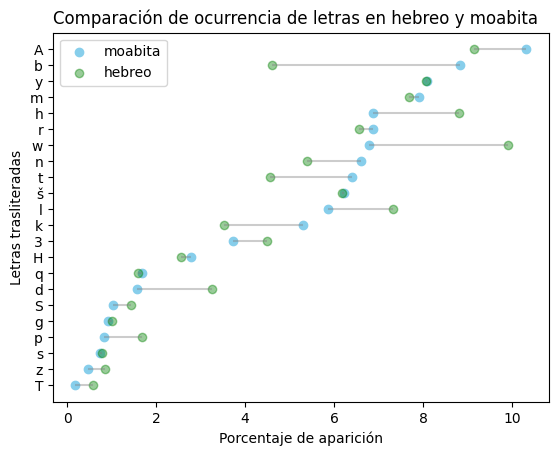

In [96]:

df = pd.DataFrame(diccionario_frecuencia_letras)
 
# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='moabita')
my_range=range(1,len(df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_df['moabita'], xmax=ordered_df['hebreo'], color='grey', alpha=0.4)
plt.scatter(ordered_df['moabita'], my_range, color='skyblue', alpha=1, label='moabita')
plt.scatter(ordered_df['hebreo'], my_range, color='green', alpha=0.4 , label='hebreo')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df['letras'])
plt.title("Comparación de ocurrencia de letras en hebreo y moabita", loc='left')
plt.xlabel('Porcentaje de aparición')
plt.ylabel('Letras trasliteradas')

# Show the graph
plt.show()

# Ley de Zipf

La siguiente hipótesis que quiero probar es que la estela de Mesa cumple la Ley de Zipf. La ley de Zipf es una ley empírica que parece cumplirse aproximadamente en todos los textos de cualquier lengua. Esta ley predice que la probabilidad de ocurrencia de una palabra sigue la siguiente relación:

$$P_n \propto \frac{1}{n^a}$$

El valor $P_{n}$ es la probabilidad de ocurrencia de la palabra $n$ veces común en un texto y $a$ es un número que normalmente toma un valor ligeramente superior a 1. ¿Qué quiere decir esto? Que, si la palabra más común del texto aparece 100 veces, la segunda más común aparecerá $1/2$ de la primera, es decir, 50. La tercera palabra más común aparecerá $1/3$, es decir, unas 33 veces. La cuarta $1/4$, 25. Y así sucesivamente.

Esto implica que:
$$P_n = K \cdot \frac{1} {n^a} \Rightarrow \log P_n= \log K-\log n^a \Rightarrow \log P_n= \log K - a \log n$$

Es decir, si tomamos logaritmos de las frecuencias y la posición en el _ranking_ de palabras más comunes, podemos asemejar fácilmente la gráfica a una recta de pendiente $-a$ que, como hemos dicho, tendrá un valor cercano a $-1$.

Veamos el resultado para el Antiguo Testamento en hebreo:

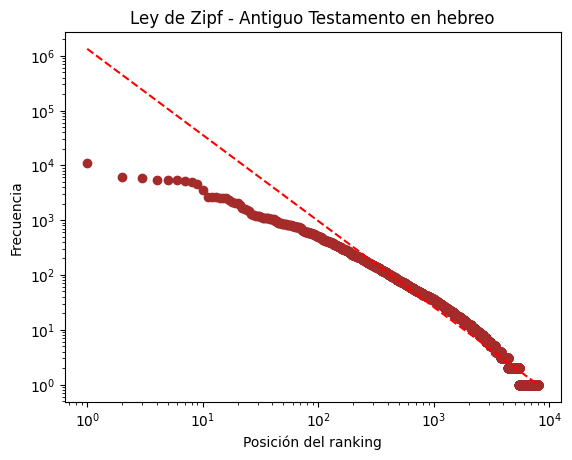

El parámetro a de la ley de Zipf para el Antiguo Testamento hebreo es -1.57.


In [97]:
m_at_h = dibujar_zipf_at(biblia[biblia['language']=='H'], 'occurrences', 'brown', 'Ley de Zipf - Antiguo Testamento en hebreo')
print(f'El parámetro a de la ley de Zipf para el Antiguo Testamento hebreo es {round(m_at_h, 2)}.')

Ahora veamos que se cumple en las pocas partes del Antiguo Testamento escritas en arameo:

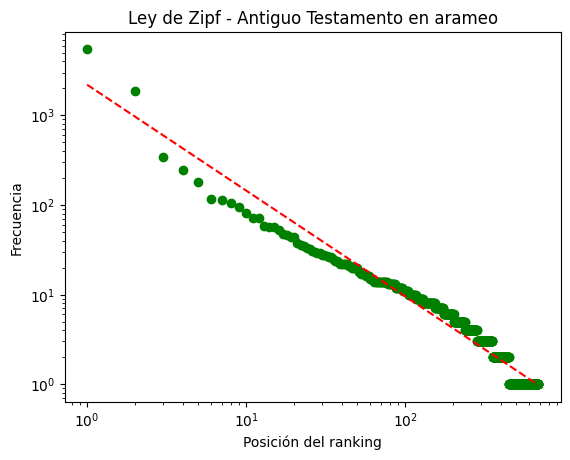

El parámetro a de la ley de Zipf para el Antiguo Testamento arameo es -1.18.


In [98]:
m_at_a = dibujar_zipf_at(biblia[biblia['language']=='A'], 'occurrences', 'green', 'Ley de Zipf - Antiguo Testamento en arameo')
print(f'El parámetro a de la ley de Zipf para el Antiguo Testamento arameo es {round(m_at_a, 2)}.')

Y este es el resultado de aplicar este análisis a la estela de Mesa:

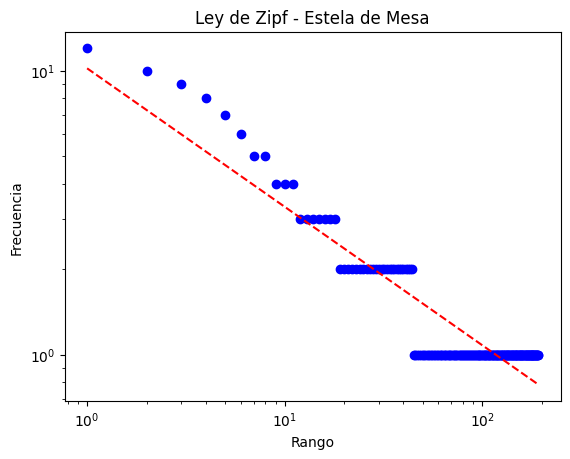

El parámetro a de la ley de Zipf para el Antiguo Testamento arameo es -0.49.


In [99]:
m_m = dibujar_zipf_mesha(palabras_estela, 'transcripcion', 'blue', 'Ley de Zipf - Estela de Mesa')
print(f'El parámetro a de la ley de Zipf para el Antiguo Testamento arameo es {round(m_m, 2)}.')

El hecho de que la ley de Zipf se aproxime tan razonablemente bien a lo predicho a pesar de constar de tan pocas palabras, nos hace pensar que es un texto real y no una lengua inventada.

# Análisis por palabras

Las lenguas semíticas tienen una característica común muy particular: la gran mayoría de sus palabras tienen raíces trilíteras. Esto quiere decir que para un campo semántico determinado se tiene una raíz de tres letras, consonantes. Para cambiar el significado se cambias las vocales que existen dentro de la raíz. Por ejemplo, de la raíz árabe slm está la palabra 'salam' (paz), sallam (saludar), islam (aceptación), muslim (el que acepta), etc. Esto ocurre con todas las palabras.

Para comprobar si la lengua de la estela de Mesha es semítica, se va a comprobar si hay indicios de que la mayoría de palabras sean de raíz trilítera. Pero, ¡ojo! ¡Eso no quiere decir que todas las palabras vayan a tener solo tres letras! Normalmente, tanto los artículos como las preposiciones y conjunciones se aglutinan, es decir, se escriben junto a la siguiente palabra. Dicho de otro modo, no se escribe 'el hombre fue a Barcelona y volvió' sino que se escribiría 'elhombre fue aBarcelona yvolvió'.

Así pues, vamos a comprobar si encontramos algún patrón de comienzo o final y a relacionarlo con el hebreo:

In [100]:
#Las palabras más comunes sin tener en cuenta inicios son:
palabras_estela['transcripcion'].value_counts()[:10]

transcripcion
At       12
kmš      10
wAnk      9
bnty      8
bh        7
ky        6
Ank       5
mlk       5
mAb       4
yšrAl     4
Name: count, dtype: int64

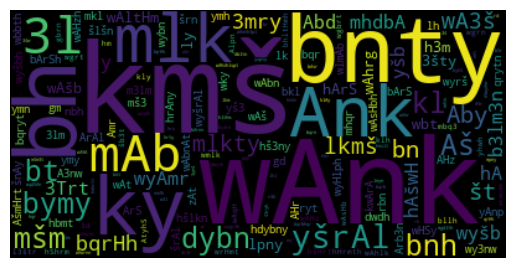

In [101]:
#Dibujar wordcloud de Mesha


text = ' '.join(list(palabras_estela['transcripcion']))

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

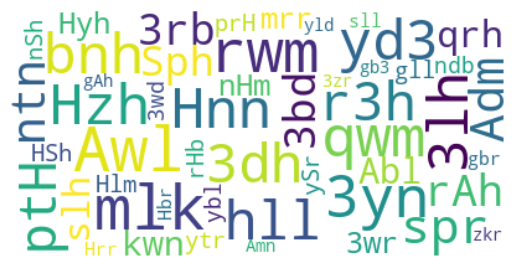

In [102]:
#Lo mismo para el hebreo:
texto_hebreo = ' '.join([i for i in list(biblia[biblia['language'] == 'H']['transcripcion']) if i != 0])

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False, max_font_size=50, max_words=50, background_color="white").generate(texto_hebreo)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

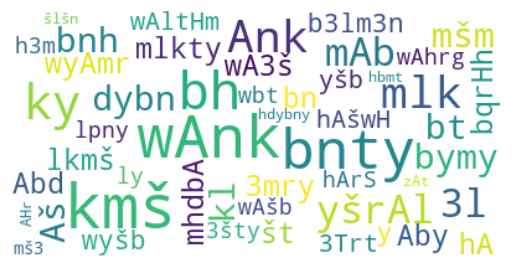

In [103]:
#Nube de palabras compartidas:
heb = np.array(texto_hebreo.split())
mesha = text.split()

wordcloud = WordCloud(collocations=False, max_font_size=50, max_words=50, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Veamos qué proporción hay de palabras trilíteras y de otro tipo de palabras:

In [104]:
lista_palabras_mesa = text.split()
una = 0
dos = 0
tres = 0
cuatro = 0
cinco = 0
otra = 0
for i in lista_palabras_mesa:
    if len(i) == 1:
        una += 1
    elif len(i) == 2:
        dos += 1
    elif len(i) == 3:
        tres += 1
    elif len(i) == 4:
        cuatro += 1
    elif len(i) == 5:
        cinco += 1
    else:
        otra += 1
lista = [una, dos, tres, cuatro, cinco, otra]
root_size = pd.DataFrame({'size':lista, 'tipo':['unilítera', 'bilítera', 'trilítera', 'tetralítera', 'pentalítera', 'otras']})


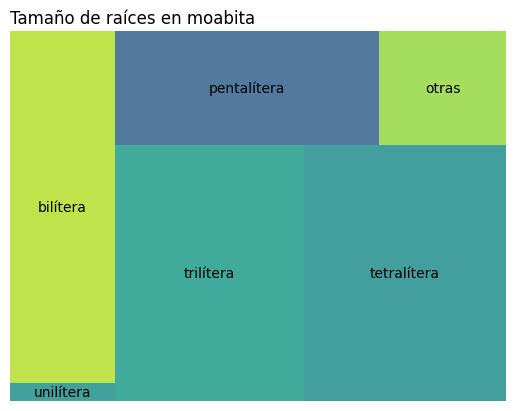

In [105]:

squarify.plot(sizes=root_size['size'], label=root_size['tipo'], alpha=0.85)
plt.axis('off')
plt.title("Tamaño de raíces en moabita", loc='left')
plt.show()

In [106]:
#Ahora lo mismo para el hebreo:

¿Esto es verdad? No, porque hay que fijarse en los artículos, enclíticos, etc.

Comienzos de palabra:

In [107]:
# Las primeras letras más comunes son:
palabras_estela['transcripcion'].str[0].value_counts()

transcripcion
w    61
b    49
A    38
m    27
k    24
h    23
3    16
y    15
l    13
š     9
d     5
r     5
g     3
H     2
q     2
n     1
z     1
Name: count, dtype: int64

In [108]:
# Dos letras:
palabras_estela['transcripcion'].str[:2].value_counts()

transcripcion
wA    32
bn    13
At    13
wy    11
km    10
      ..
Al     1
gb     1
wr     1
l3     1
rh     1
Name: count, Length: 106, dtype: int64

In [109]:
#Comienzos de palabra por w seguidas de raíz trilítera:
import re
patron = r'\b\w{3}'

def buscar_patron_w(texto):
    patron = r'\bw\w{3,9}\b'
    palabras_encontradas = re.findall(patron, texto)
    return palabras_encontradas

texto = list(palabras_estela['transcripcion'].apply(buscar_patron_w))
palabras_w = [item for item in texto if not (isinstance(item, list) and not item)]
print(len(palabras_w))

def buscar_patron_b(texto):
    patron = r'\bb\w{3,9}\b'
    palabras_encontradas = re.findall(patron, texto)
    return palabras_encontradas

texto = list(palabras_estela['transcripcion'].apply(buscar_patron_b))
palabras_b = [item for item in texto if not (isinstance(item, list) and not item)]
print(len(palabras_b))

def buscar_patron_h(texto):
    patron = r'\bh\w{3,9}\b'
    palabras_encontradas = re.findall(patron, texto)
    return palabras_encontradas

texto = list(palabras_estela['transcripcion'].apply(buscar_patron_h))
palabras_h = [item for item in texto if not (isinstance(item, list) and not item)]
print(len(palabras_h))

resto_de_letras = palabras - len(palabras_h) - len(palabras_b) - len(palabras_w)

52
28
16


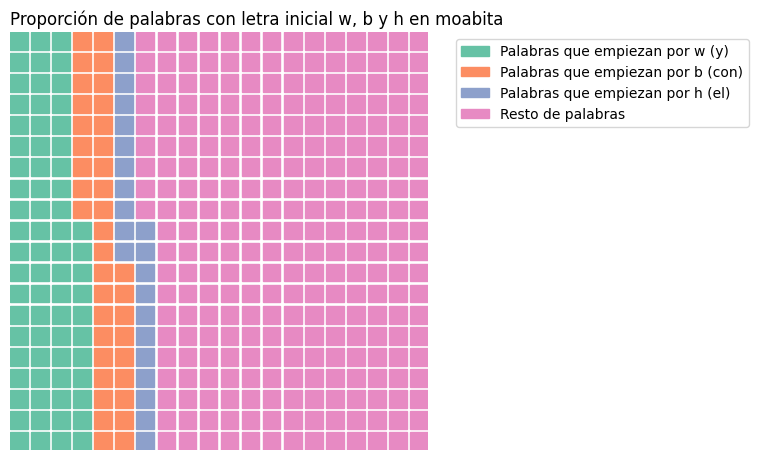

In [110]:
# create simple dummy data
dic_inicio_palabras = {'Palabras que empiezan por w (y)': len(palabras_w), 'Palabras que empiezan por b (con)': len(palabras_b), 'Palabras que empiezan por h (el)': len(palabras_h), 'Resto de palabras': resto_de_letras}

# Basic waffle
plt.figure(
  FigureClass=Waffle,
  rows=20,
  columns=20,
  values=dic_inicio_palabras,
  legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
)
plt.title("Proporción de palabras con letra inicial w, b y h en moabita", loc='left')
plt.show()

Este resultado es muy interesante porque muchas de estas palabras son palabras muy comunes en hebreo y árabe. 

- w: La primera letra más común es 'w', que en ambos idiomas es la conjunción 'y'. Se usa mucho más que en castellano, es común utilizarla como enlace de frases o incluso para separar dos frases

- b: Significa 'con' tanto en hebreo como en árabe.

- h: Es el artículo en hebreo.

Parece que hay muchos rasgos que comparten.

In [111]:
# A ver algún final:
print(palabras_estela['transcripcion'].str[-1].value_counts()[:10])

transcripcion
y    44
t    40
h    37
n    29
k    22
š    21
l    19
r    17
m    15
b    14
Name: count, dtype: int64


In [112]:
# Algún final doble
palabras_estela['transcripcion'].str[-2:].value_counts()

transcripcion
At    16
ty    14
nk    14
mš    12
bh    11
      ..
Hb     1
hm     1
Sh     1
rš     1
rh     1
Name: count, Length: 102, dtype: int64

Si se compara con una gramática de hebreo, se reconocen enseguida los tres finales más comunes:
- y: pronombre posesivo de primera persona (mi). En lenguas semíticas se diría 'libroy' para decir 'mi libro'.
- t: marca del femenino.
- h: pronombre posesivo de tercera persona (su). En lenguas semíticas se diría 'libroh' para decir 'su libro'.

In [113]:
def buscar_patron_y(texto):
    patron = r'\b\w{3,9}y\b'
    palabras_encontradas = re.findall(patron, texto)
    return palabras_encontradas

texto = list(palabras_estela['transcripcion'].apply(buscar_patron_y))
palabras_y = [item for item in texto if not (isinstance(item, list) and not item)]
print(len(palabras_y))

def buscar_patron_t(texto):
    patron = r'\b\w{3,9}t\b'
    palabras_encontradas = re.findall(patron, texto)
    return palabras_encontradas

texto = list(palabras_estela['transcripcion'].apply(buscar_patron_t))
palabras_t = [item for item in texto if not (isinstance(item, list) and not item)]
print(len(palabras_t))

28
15


Ahora vamos a hacer una gráfica que muestre de nuevo palabras:

In [114]:
palabras_estela_lista = text.split()
w = 0
h = 0
b = 0
y_final = 0
t_final = 0
h_final = 0
posibles_raices_moabita = []
for i in palabras_estela_lista:
    palabra = i
    if len(palabra)>3:
        if i[-1] == 'y':
            palabra = palabra[:-1]
            y_final += 1
        elif i[-1] == 't':
            palabra = palabra[:-1]
            t_final += 1
    if len(palabra)>3:
        if i[0] == 'w':
            palabra = palabra[1:]
            w += 1
        elif i[0] == 'b':
            palabra = palabra[1:]
            b += 1
        elif i[0] == 'h':
            palabra = palabra[1:]
            h += 1
    posibles_raices_moabita.append(palabra)
        
        

print(posibles_raices_moabita)

['Ank', 'mš3', 'bn', 'kmš', 'mlk', 'mAb', 'dybn', 'Aby', 'mlk', '3l', 'mAb', 'šlšn', 'št', 'Ank', 'mlkt', 'AHr', 'Aby', 'A3š', 'hbm', 'zAt', 'lkmš', 'qrHh', 'bns', 'yš3', 'ky', 'š3n', 'mkl', 'šlkn', 'wky', 'rAn', 'bkl', 'šnA', '3mr', 'mlk', 'yšrAl', 'y3nw', 'At', 'mAb', 'ymn', 'rbn', 'ky', 'yAnp', 'kmš', 'ArSh', 'yHlph', 'bnh', 'yAmr', 'gm', 'hA', 'A3nw', 'At', 'mAb', 'bym', 'Amr', 'kwArA', 'bh', 'bbth', 'yšrAl', 'Abd', 'Abd', '3lm', 'yrš', '3mr', 'At', 'ArS', 'mhdbA', 'yšb', 'bh', 'ymh', 'wHS', 'ymy', 'bnh', 'Arb3n', 'št', 'yšbh', 'kmš', 'bym', 'Abn', 'At', '3lm3n', 'A3š', 'bh', 'AšwH', 'AbnA', 'qrytn', 'wAš', 'gd', 'yšb', 'ArS', '3Tr', 'm3lm', 'ybn', 'lh', 'mlk', 'y', 'šrAl', 'At', '3Tr', 'AltHm', 'bqr', 'AHzh', 'Ahrg', 'At', 'kl', 'h3m', 'mhqr', 'ryt', 'lkmš', 'lmAb', 'Ašb', 'mšm', 'At', 'ArAl', 'dwdh', 'AsHbh', 'lpn', 'kmš', 'qry', 'Ašb', 'bh', 'At', 'Aš', 'šrn', 'wAt', 'AšmHr', 'yAmr', 'ly', 'kmš', 'lk', 'AHz', 'At', 'nbh', '3l', 'yšrAl', 'Ahlk', 'llh', 'AltHm', 'bh', 'mbq3', 'šHr

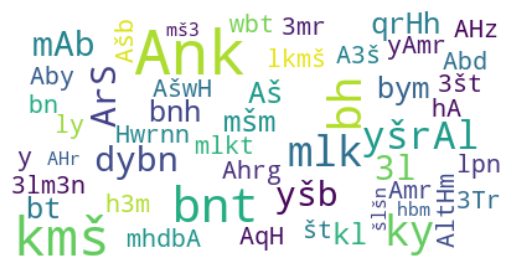

In [115]:
# Nuevo wordcloud:
wordcloud = WordCloud(collocations=False, max_font_size=50, max_words=50, background_color="white").generate(' '.join(posibles_raices_moabita))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


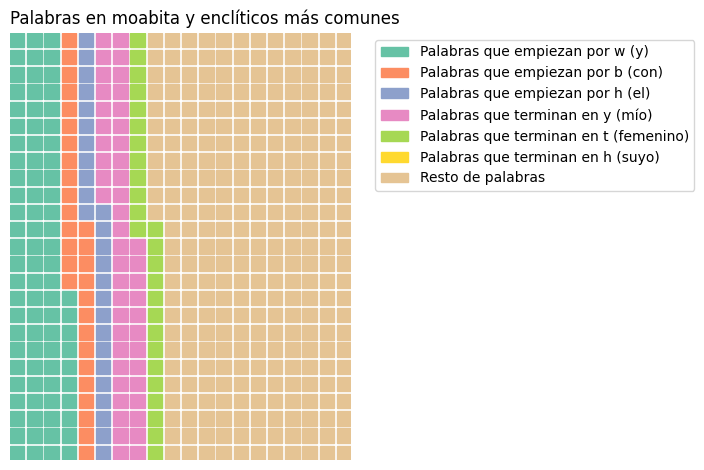

In [116]:
# Waffle más elegante:
dic_posibles_raices = {'Palabras que empiezan por w (y)': w, 'Palabras que empiezan por b (con)': b, 'Palabras que empiezan por h (el)': h,
                        'Palabras que terminan en y (mío)': y_final, 'Palabras que terminan en t (femenino)': t_final,
                        'Palabras que terminan en h (suyo)': h_final,'Resto de palabras': len(posibles_raices_moabita)-w-h-b-y_final-t_final-h_final}

# Basic waffle
plt.figure(
  FigureClass=Waffle,
  rows=25,
  columns=20,
  values=dic_posibles_raices,
  legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
)
plt.title("Palabras en moabita y enclíticos más comunes", loc='left')
plt.show()

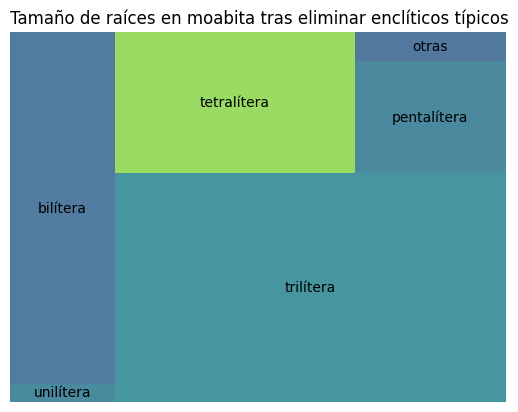

In [117]:

una = 0
dos = 0
tres = 0
cuatro = 0
cinco = 0
otra = 0
for i in posibles_raices_moabita:
    if len(i) == 1:
        una += 1
    elif len(i) == 2:
        dos += 1
    elif len(i) == 3:
        tres += 1
    elif len(i) == 4:
        cuatro += 1
    elif len(i) == 5:
        cinco += 1
    else:
        otra += 1
lista = [una, dos, tres, cuatro, cinco, otra]
root_size = pd.DataFrame({'size':lista, 'tipo':['unilítera', 'bilítera', 'trilítera', 'tetralítera', 'pentalítera', 'otras']})

squarify.plot(sizes=root_size['size'], label=root_size['tipo'], alpha=0.85)
plt.axis('off')
plt.title("Tamaño de raíces en moabita tras eliminar enclíticos típicos", loc='left')
plt.show()

Llegado a este punto, ¿sería posible traducir esta estela a partir del hebreo? Para ver cuántas raíces tienen en común, vamos a dibujar un gráfico:

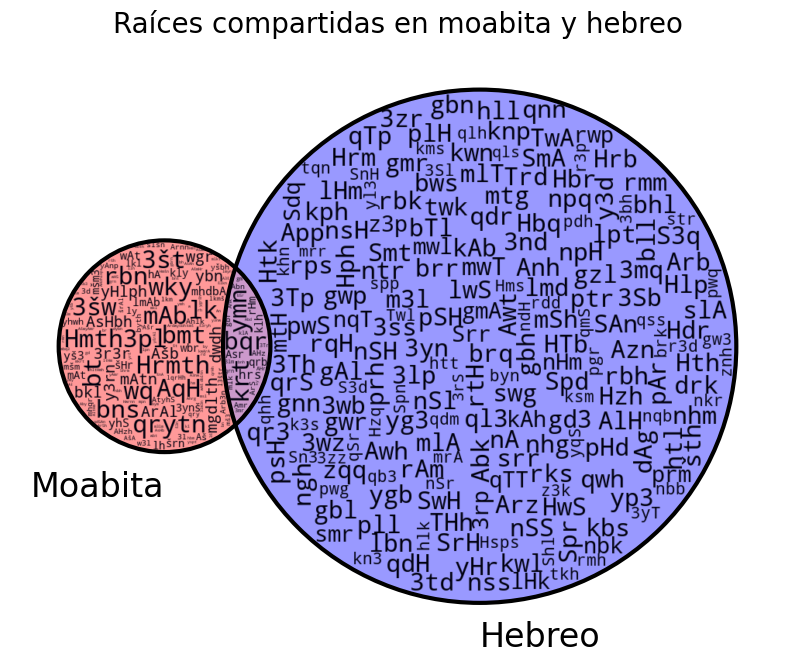

In [118]:


fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Raíces compartidas en moabita y hebreo', fontsize=20)

v = venn2_wordcloud([set(posibles_raices_moabita), set(biblia[(biblia['language'] == 'H') & (biblia['transcripcion'] != 0)]['transcripcion'])],
                    ax=ax, set_labels=['Moabita', 'Hebreo'])# add color

v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('10').set_alpha(0.4)
v.get_patch_by_id('01').set_color('blue')
v.get_patch_by_id('01').set_alpha(0.4)
v.get_patch_by_id('11').set_color('purple')
v.get_patch_by_id('11').set_alpha(0.4)

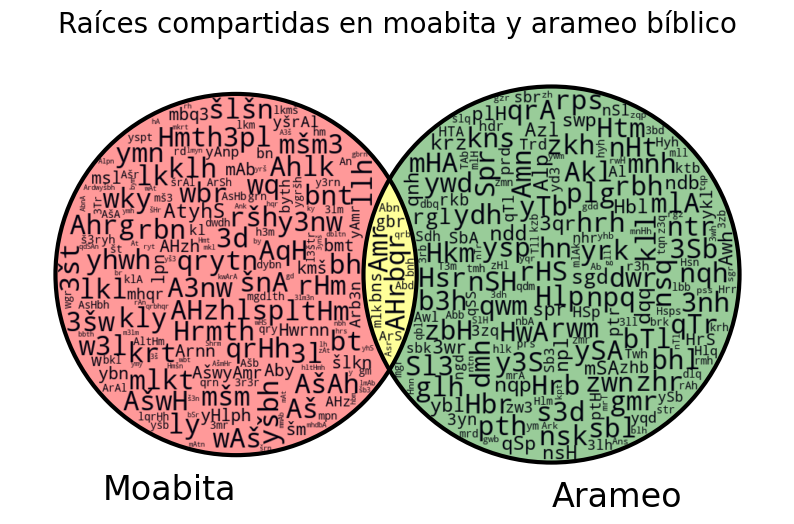

In [119]:
# Lo mismo para el arameo:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Raíces compartidas en moabita y arameo bíblico', fontsize=20)

v = venn2_wordcloud([set(posibles_raices_moabita), set(biblia[(biblia['language'] == 'A') & (biblia['transcripcion'] != 0)]['transcripcion'])],
                    ax=ax, set_labels=['Moabita', 'Arameo'])# add color

v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('10').set_alpha(0.4)
v.get_patch_by_id('01').set_color('green')
v.get_patch_by_id('01').set_alpha(0.4)
v.get_patch_by_id('11').set_color('yellow')
v.get_patch_by_id('11').set_alpha(0.4)

A primera vista se podría pensar que las raíces que comparten son muy pocas. Pero hay que tener en cuenta dos puntos:
1. Las palabras compartidas son las más comunes.
2. Muchas de las raíces no compartidas se acercan mucho fonéticamente así que, aunque no sea exactamente igual, un lingüista podría reconocer el patrón (por ejemplo, de sonido T a sh en el número 30, shalasha)
3. Hay más lenguas semíticas que se conocen (ugarítico, acadio, etiópico, árabe...) y podrían tener más raíces en común.

De hecho, lingüistas expertos tradujeron esta estela en el siglo XIX a pesar de las pocas raíces que tienen en común.

¿Intentamos traducir la primera frase? Para esto hay que utilizar este diccionario y el usuario debe introducir el significado que mejor le suene en función de los significados de las raíces de palabras hebreas similares.

In [120]:
# Para probar este traductor interactivo, descomenta la siguiente línea: 
#diccionario(biblia, palabras_estela)